Lab: neural network fundamentals
-----

In [1]:
reset -fs

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from pandas import DataFrame

%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from neural_network import *

TODO: Create 2d array for X

X[:,0] is from (0, n), where is n is 30 to start
X[:,1] are random numbers

In [42]:
X = np.array([[i,np.random.randn()] for i in range(31)])

In [67]:
#normalize the data
X = X/np.amax(X, axis=0)
X

array([[  0.00000000e+00,   1.38722505e-01],
       [  3.33333333e-02,   4.26953555e-05],
       [  6.66666667e-02,   1.00000000e+00],
       [  1.00000000e-01,  -9.74293040e-02],
       [  1.33333333e-01,   8.05234919e-01],
       [  1.66666667e-01,  -2.35053928e-01],
       [  2.00000000e-01,   5.00892806e-01],
       [  2.33333333e-01,   3.01147083e-01],
       [  2.66666667e-01,   2.66882218e-01],
       [  3.00000000e-01,  -9.18584174e-01],
       [  3.33333333e-01,  -6.41068723e-01],
       [  3.66666667e-01,   4.87170760e-01],
       [  4.00000000e-01,  -1.59082509e+00],
       [  4.33333333e-01,  -4.60823252e-01],
       [  4.66666667e-01,   4.50756991e-01],
       [  5.00000000e-01,  -5.95820296e-01],
       [  5.33333333e-01,  -2.82955745e-01],
       [  5.66666667e-01,   5.40458587e-02],
       [  6.00000000e-01,   6.79130126e-01],
       [  6.33333333e-01,  -5.52564730e-01],
       [  6.66666667e-01,  -4.06531201e-01],
       [  7.00000000e-01,  -1.22205241e+00],
       [  

TODO: Create y, where y is the following function of X[:,0]

In [190]:
poly_function = lambda x: 2 + 0.5 * x + 3 * x ** 2 + 5 * stats.norm.rvs(0, 10)

In [191]:
y_first = poly_function(X[:,0])

In [192]:
# get the correct shape
y_first = y_first.reshape(-1,1)

In [193]:
#normalize the y
y_first =y_first/np.amax(y_first, axis=0)

In [194]:
y_first

array([[ 0.83679486],
       [ 0.83772746],
       [ 0.83897093],
       [ 0.84052526],
       [ 0.84239046],
       [ 0.84456653],
       [ 0.84705347],
       [ 0.84985127],
       [ 0.85295994],
       [ 0.85637948],
       [ 0.86010988],
       [ 0.86415115],
       [ 0.86850329],
       [ 0.87316629],
       [ 0.87814016],
       [ 0.8834249 ],
       [ 0.8890205 ],
       [ 0.89492698],
       [ 0.90114432],
       [ 0.90767252],
       [ 0.91451159],
       [ 0.92166153],
       [ 0.92912234],
       [ 0.93689401],
       [ 0.94497655],
       [ 0.95336996],
       [ 0.96207423],
       [ 0.97108938],
       [ 0.98041538],
       [ 0.99005226],
       [ 1.        ]])

TODO: Plot X and y

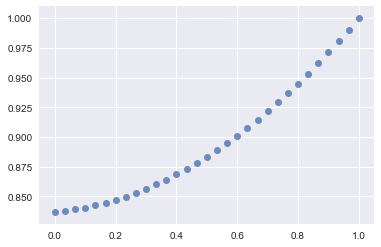

In [195]:
sns.regplot(X[:,0],y_first, fit_reg=False)

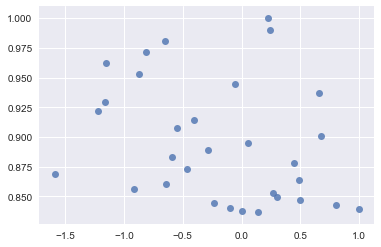

In [196]:
# noise
sns.regplot(X[:,1],y_first, fit_reg=False)

TODO: Train the NN from lecture

In [197]:
nn = NeuralNetwork()

In [198]:

t = Trainer(nn)
t.train(X, y_first, maxiter=100)

         Current function value: 0.001420
         Iterations: 100
         Function evaluations: 105
         Gradient evaluations: 105


TODO: Plot observed for y. On the same figure, plot predicted for y. The domain is X[:,0].

In [199]:
DataFrame({'y predicted': t.N.y_hat.flatten().tolist(),
           'y observed': y_first.flatten().tolist()})

,y observed,y predicted
0,0.836795,0.825094
1,0.837727,0.826483
2,0.838971,0.834385
3,0.840525,0.830762
4,0.842390,0.837754
5,0.844567,0.836065
6,0.847053,0.842308
7,0.849851,0.845360
8,0.852960,0.849448
9,0.856379,0.851219


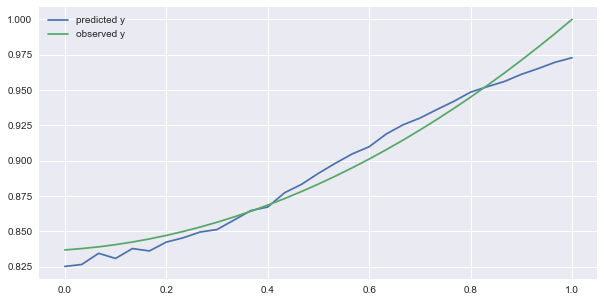

In [200]:
plt.figure(figsize=(10,5))
plt.plot(X[:,0],t.N.y_hat.flatten(),label='predicted y')
plt.plot(X[:,0],y_first.flatten(),label='observed y')
plt.legend()

TODO: Plot the residuals, aka observed versus predicted for y

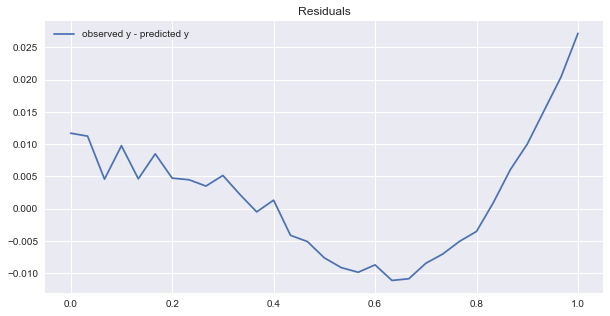

In [201]:
plt.figure(figsize=(10,5))
plt.plot(X[:,0],y_first.flatten()-t.N.y_hat.flatten(),label='observed y - predicted y')
plt.legend()
plt.title("Residuals")

TODO: Plot cost over iterations

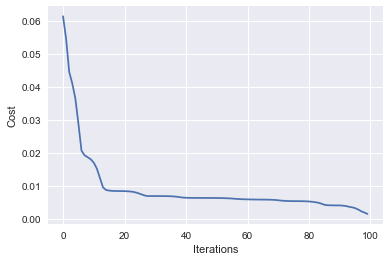

In [202]:
plot(t.J)
xlabel('Iterations')
ylabel('Cost');

TODO: Summarize your model

In [ ]:
# This basic model has two input nodes, that are transferred to a hidden layer. In this hidden layer a weight is 
# applied to each input, then a sigmoid activation function is used on the summation. Next another weight is applied
# to this activation to produce an output

<details><summary>
Click here for a hints (if stuck)
</summary>
Check the shape of y. Compare to X and values from lecture
<br>
<br>
Did you normalize?
</details>

-----

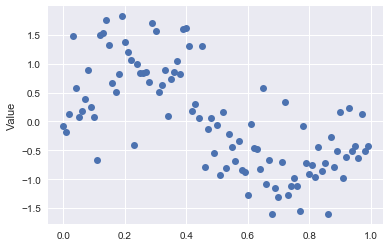

In [7]:
# Let's go crazy with very nonlinear data
# https://github.com/JoeFannie/Polynomial-Regression/blob/master/src/Polyfit%26Lasso.ipynb

n = 100
t = np.arange(0,1.0,0.001)
x = np.arange(0,1,1.0/n)
y = np.random.normal(0,0.5,n) + np.sin(2*np.pi*x*1000/1000)

plt.plot(x,y,'o');
plt.ylabel('Value');

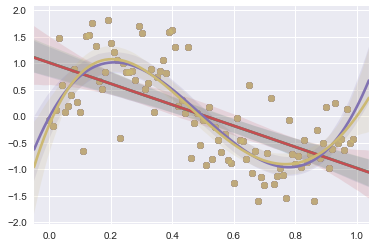

In [8]:
# Fit different polynominals
for order in range(5):
    sns.regplot(x=x,
               y=y,
               order=order);

TODO: Create 2d array for X

X[:,0] is x  
X[:,1] are random numbers

In [9]:
x = x.reshape(-1,1)

In [10]:
X_ = [[float(x[i,:]),np.random.randn()] for i in range(len(x)) ]

In [11]:
#normalize X_
X_ = X_/ np.amax(X_,axis=0)

TODO: Create the y for training the model

In [14]:
y_ = y

In [15]:
#Normalzie y_
y_ = y_ / np.amax(y,axis=0)
# move up y to be positive

y_ = (y_ - np.min(y_))/(max(y_)-min(y_))

TODO: Train the NN from lecture

In [16]:
y_ = y_.reshape(-1,1)

In [19]:
nn_ = NeuralNetwork(hidden=100)
t_ = Trainer(nn_)
t_.train(X_, y_, maxiter=250)

         Current function value: 0.992088
         Iterations: 250
         Function evaluations: 268
         Gradient evaluations: 268


TODO: Plot observed for y. On the same figure, plot predicted for y. The domain is X[:,0].

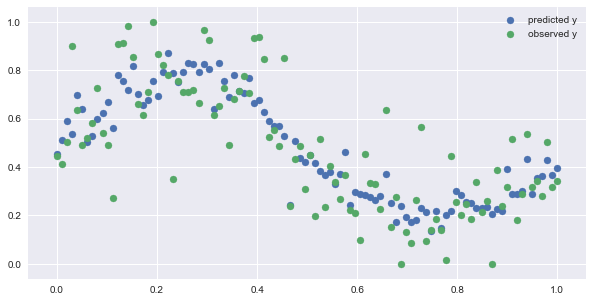

In [20]:
plt.figure(figsize=(10,5))
plt.scatter(X_[:,0],nn_.y_hat.flatten(),label='predicted y')
plt.scatter(X_[:,0],y_.flatten(),label='observed y')
plt.legend()

TODO: Plot the residuals, aka observed versus predicted for y

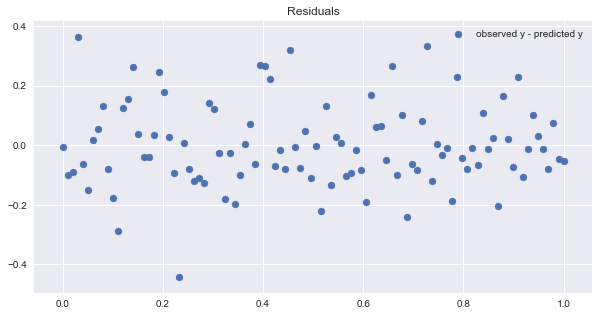

In [22]:
plt.figure(figsize=(10,5))
plt.scatter(X_[:,0],y_.flatten()-nn_.y_hat.flatten(),label='observed y - predicted y')
plt.legend()
plt.title("Residuals")

TODO: Plot cost over iterations

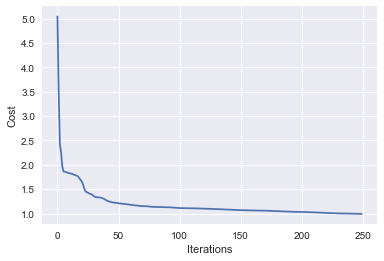

In [23]:
plot(t_.J)
xlabel('Iterations')
ylabel('Cost');

TODO: Summarize your model

In [ ]:
# For this model to learn a polynomial , we had to make a couple of modifications 
# 1) scale X and y to remove the mean , then also increase y to remove the negative values

TODO: Reflect on what you learned about neural networks

In [ ]:
# 

TODO: Play with http://playground.tensorflow.org/. What insights do you get?

-----
Challenge Activities
----

TODO: Fit Neural Network classifier on the spiral dataset.

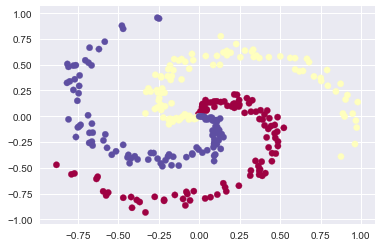

In [24]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N) # radius
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j

# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral);

In [55]:
nn_2.y_hat

array([[  6.16313399e-01],
       [  5.07830752e-04],
       [  1.88924054e-05],
       [  2.53876203e-05],
       [  1.62144897e-04],
       [  2.31016519e-06],
       [  1.41455095e-05],
       [  1.19565507e-02],
       [  1.24040501e-03],
       [  2.31050997e-08],
       [  2.39034584e-09],
       [  1.69661996e-08],
       [  1.85779041e-08],
       [  3.17032835e-05],
       [  2.64719394e-10],
       [  1.48330097e-09],
       [  1.40549474e-08],
       [  1.37714478e-08],
       [  2.47755916e-09],
       [  5.31181296e-10],
       [  1.01646865e-02],
       [  1.26445253e-10],
       [  5.85244998e-02],
       [  1.73526690e-01],
       [  1.21336935e-03],
       [  7.69108243e-04],
       [  3.38068257e-02],
       [  5.58270154e-03],
       [  5.00032871e-02],
       [  5.93080043e-06],
       [  5.83666710e-14],
       [  1.18784600e-13],
       [  5.21436539e-03],
       [  1.06677263e-03],
       [  1.91428848e-05],
       [  2.00903185e-03],
       [  1.91706883e-04],
 

In [33]:
#normalize X_
X= X/ np.amax(X,axis=0)

In [35]:
#Normalzie y_
y= y / np.amax(y,axis=0)
# move up y to be positive

y = (y - np.min(y))/(max(y)-min(y))

In [36]:
y = y.reshape(-1,1)

In [56]:
nn_2 = NeuralNetwork(200)

In [57]:

t_2= Trainer(nn_2)
t_2.train(X, y, maxiter=1000)

         Current function value: 1.295538
         Iterations: 1000
         Function evaluations: 1049
         Gradient evaluations: 1049


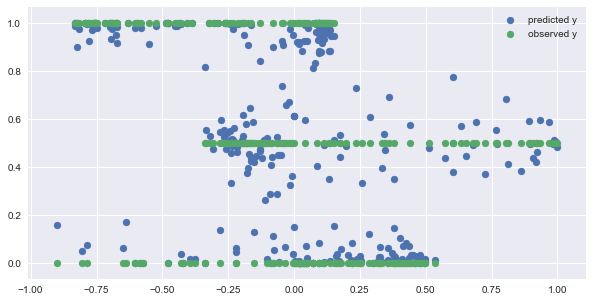

In [58]:
plt.figure(figsize=(10,5))
plt.scatter(X[:,0],nn_2.y_hat.flatten(),label='predicted y')
plt.scatter(X[:,0],y.flatten(),label='observed y')
plt.legend()

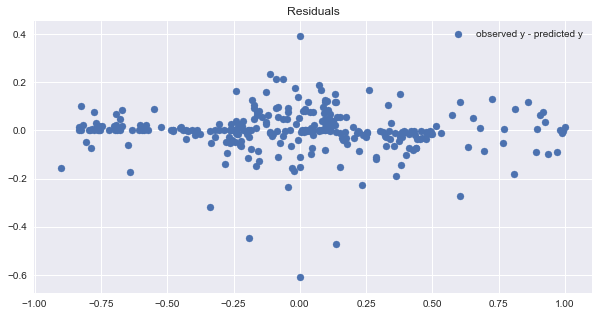

In [59]:
plt.figure(figsize=(10,5))
plt.scatter(X[:,0],y.flatten()-nn_2.y_hat.flatten(),label='observed y - predicted y')
plt.legend()
plt.title("Residuals")

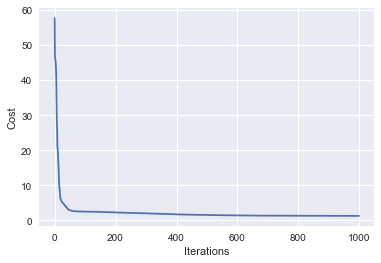

In [60]:
plot(t_2.J)
xlabel('Iterations')
ylabel('Cost');

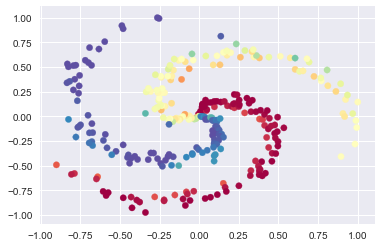

In [61]:
plt.scatter(X[:, 0], X[:, 1], c=nn_2.y_hat, s=40, cmap=plt.cm.Spectral);

<details><summary>
Click here for a hint…
</summary>
http://cs231n.github.io/neural-networks-case-study/
</details>

-----

TODO: Fit Neural Network classifier on XOR data in Chapter 6 of Deep Learning book

<br>
<br> 
<br>

----